In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

In [40]:
data = pd.read_stata("https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/RDD_data.dta")

In [48]:
data["treatment"] = data.pmt_score >= data.cutoff
data['tmt_status'] = np.where(data.tmt_status == "Control", 0, 1)

In [4]:
from patsy import dmatrices
from sklearn.linear_model import LinearRegression
x, y = "pmt_score", "tmt_status"
fmla = f"{y} ~ bs({x}, df = 3)"
data_0 = data[data.treatment == 0]
data_1 = data[data.treatment == 1]
y, x = dmatrices(fmla, data_0, return_type="dataframe")
y1, x1 = dmatrices(fmla, data_1, return_type = "dataframe")
m_0 = LinearRegression().fit(x, y)
m_1 = LinearRegression().fit(x1, y1)
data_0['y_hat'] = np.concatenate(m_0.predict(x))
data_1['y_hat'] = np.concatenate(m_1.predict(x1))
data_0.sort_values(by = "pmt_score", inplace=True)
data_1.sort_values(by = "pmt_score", inplace = True)

C:\Users\Jhon\AppData\Local\Temp\ipykernel_12052\2542453882.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_0['y_hat'] = np.concatenate(m_0.predict(x))
C:\Users\Jhon\AppData\Local\Temp\ipykernel_12052\2542453882.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['y_hat'] = np.concatenate(m_1.predict(x1))
C:\Users\Jhon\AppData\Local\Temp\ipykernel_12052\2542453882.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

Text(0.5, 0, 'Proxy means test score')

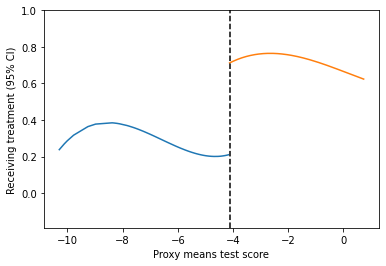

In [21]:
plt.plot(data_0.pmt_score, data_0.y_hat)
plt.plot(data_1.pmt_score, data_1.y_hat)
plt.axvline(-4.1, color = "black", linestyle = "--")
plt.ylim(-0.19, 1)
plt.ylabel("Receiving treatment (95% CI)")
plt.xlabel("Proxy means test score")

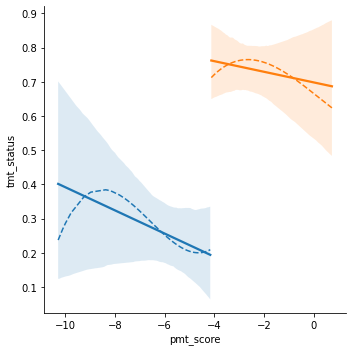

In [59]:
import pandas as pd
import seaborn as sns

sns.lmplot(x="pmt_score", y="tmt_status", hue = "treatment", data=data
           , scatter = false, legend = false
          )
plt.plot(data_0.pmt_score, data_0.y_hat, linestyle = "--")
plt.plot(data_1.pmt_score, data_1.y_hat, linestyle = "--")
# plt.ylim(0, 1)

# data

<AxesSubplot:xlabel='pmt_score', ylabel='tmt_status'>

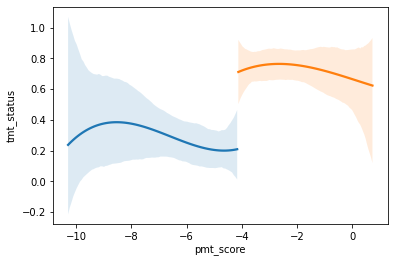

In [67]:
sns.regplot(x="pmt_score", y="tmt_status",  data=data_0, 
            order = 3, scatter = False
           )
sns.regplot(x="pmt_score", y="tmt_status",  data=data_1, 
            order = 3, scatter = False
           )

In [ ]:
sns.regplot(x="pmt_score", y="tmt_status",  data=data_0, 
            order = 3, scatter = False
           )
sns.regplot(x="pmt_score", y="tmt_status",  data=data_1, 
            order = 3, scatter = False
           )